#### [PREV](7.OOP_Neural_Network_Adv.ipynb) | [HOME](../README.md)

---

# OOP Decision Trees Implementation

In this notebook you will visualize how a decision tree is 'splitted' using information gain. This is a very complex implementation, students are not expected to write their own implementaion, but rather step through the Jupyter Notebook and deepen their understanding of 'information gain' and 'splitting' through the visual demononstration. 

#### Step 1 - Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Step 2: Preview The Data

|                                                     |   Ear Shape | Face Shape | Whiskers |   Cat  |
|:---------------------------------------------------:|:---------:|:-----------:|:---------:|:------:|
| <img src="images\0.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="images\1.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Present  |    1   |
| <img src="images\2.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |
| <img src="images\3.png" alt="drawing" width="50"/> |   Pointy   |  Not Round  |  Present  |    0   |
| <img src="images\4.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="images\5.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Absent   |    1   |
| <img src="images\6.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Absent   |    0   |
| <img src="images\7.png" alt="drawing" width="50"/> |   Pointy   |  Round      |  Absent   |    1   |
| <img src="images\8.png" alt="drawing" width="50"/> |    Floppy  |   Round     |  Absent   |    0   |
| <img src="images\9.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |


We will use **one-hot encoding** to encode the categorical features. They will be as follows:

- Ear Shape: Pointy = 1, Floppy = 0
- Face Shape: Round = 1, Not Round = 0
- Whiskers: Present = 1, Absent = 0

Therefore, we have two sets:

- `X_train`: for each example, contains 3 features:
            - Ear Shape (1 if pointy, 0 otherwise)
            - Face Shape (1 if round, 0 otherwise)
            - Whiskers (1 if present, 0 otherwise)
            
- `y_train`: whether the animal is a cat
            - 1 if the animal is a cat
            - 0 otherwise

#### Step 2: Import The Data

In [2]:
# Feature variable
X_train = np.array([[1, 1, 1],
[0, 0, 1],
[0, 1, 0],
[1, 0, 1],
[1, 1, 1],
[1, 1, 0],
[0, 0, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 0]])

# Target or ground truth variable
y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

# Column names variable
feature_cols = ['Ear shape', 'Face shape', 'Whiskers']


In [3]:
#For instance, the first example
print(X_train[0])
print(y_train[0])

[1 1 1]
1


This means that the first example has a pointy ear shape, round face shape and it has whiskers and is the category of a cat.

#### Step 3: Instantiate a Decision Tree Classifier Object

In [4]:
clf = DecisionTreeClassifier()

#### Step 4: Fit the model

In [5]:
clf = clf.fit(X_train,y_train)

#### Step 5: Predict Values

In [6]:
# Predict the response for dataset
y_pred = clf.predict(X_train)

print(y_pred)

[1 1 0 0 1 1 0 1 0 0]


#### Step 6: Evaluate The Model

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


#### Step 7: Visual The Model & Statisics

On each node, we compute the information gain for each feature, then split the node on the feature with the higher information gain, by comparing the entropy of the node with the weighted entropy in the two splitted nodes. 

So, the best feature to split is indeed the Ear Shape. Run the code below to see the split in action. You do not need to understand the following code block. 

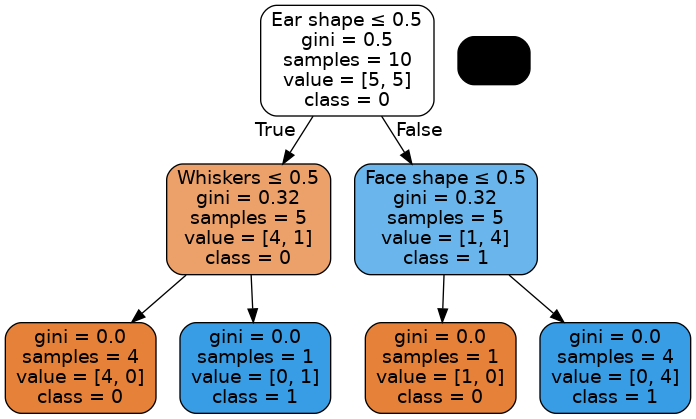

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('images/cat.png')
Image(graph.create_png())

The final tree looks like this:

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 1
  -- Left leaf node with indices [0, 4, 5, 7]
  -- Right leaf node with indices [3]
- Depth 1, Right: Split on feature: 2
  -- Left leaf node with indices [1]
  -- Right leaf node with indices [2, 6, 8, 9]


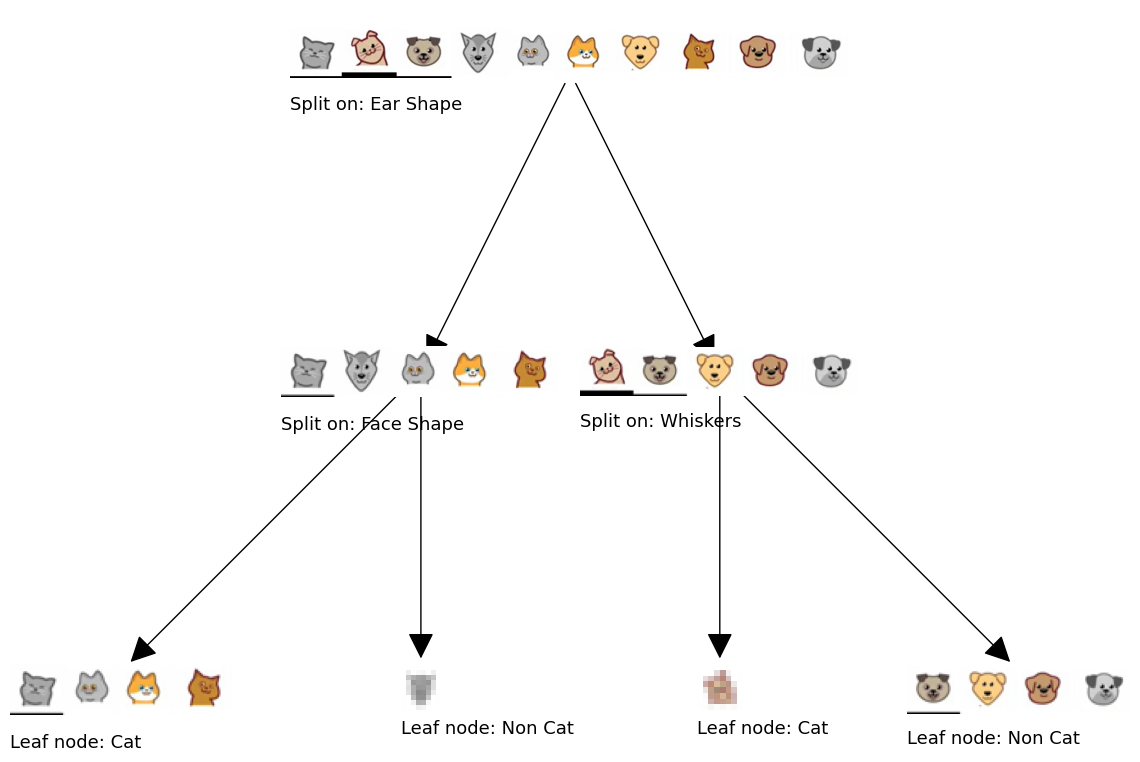

In [ ]:
# Note:
#  - This is a custom module, built to visual this problem
#  - Students should scroll past the code to see the visualisation
import sys
sys.path.insert(1, 'lib')
from utils import *

tree = []
build_tree_recursive(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=2, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)